## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import datetime
import category_encoders as ce

## Import data

In [97]:
df_train = pd.read_csv("training.csv")
df_test = pd.read_csv("test.csv")
profile = pd.read_csv(r"C:\Users\ADEBAYO\Desktop\Current DS\Xente\Customer Profile.csv",parse_dates=['TransactionStartTime'])
labelled=pd.read_csv(r"C:\Users\ADEBAYO\Desktop\Best1609.csv")

In [98]:
#df_test=df_test.merge(labelled,on='TransactionId')

In [99]:
#df=df_test[df_test.FraudResult==1]

In [100]:
#df_train=df_train.append(df)

## EDA

### Combine the training and test data together

In [101]:
ndf_train = df_train.shape[0]
ndf_test = df_test.shape[0]

In [102]:
cmdata = pd.concat((df_train, df_test)).reset_index(drop=True)
print("combine data size is: {}".format(cmdata.shape))

C:\Users\ADEBAYO\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


combine data size is: (140681, 16)


In [103]:
profile=profile[['TransactionId','TimeBetweenTransaction', 'AmountBetweenTransaction',
       'PreviousTransactionBetweenHour', 'NumberOfTransactionWithinHour',
       'AveAmtWithinPeriod']]

In [108]:
#cmdata=cmdata.join(profile2,on='CustomerId',lsuffix='l').join(profile3,on='ChannelId',lsuffix='l').join(profile4,on='ProductId',lsuffix='l').join(profile5,on='ProviderId',lsuffix='l')

In [109]:
#cmdata=cmdata.merge(profile,on='TransactionId')

In [110]:
cmdata.columns

Index(['AccountId', 'Amount', 'BatchId', 'ChannelId', 'CountryCode',
       'CurrencyCode', 'CustomerId', 'FraudResult', 'PricingStrategy',
       'ProductCategory', 'ProductId', 'ProviderId', 'SubscriptionId',
       'TransactionId', 'TransactionStartTime', 'Value'],
      dtype='object')

In [111]:
cmdata.head()

,AccountId,Amount,BatchId,ChannelId,CountryCode,CurrencyCode,CustomerId,FraudResult,PricingStrategy,ProductCategory,ProductId,ProviderId,SubscriptionId,TransactionId,TransactionStartTime,Value
0,AccountId_3957,1000.0,BatchId_36123,ChannelId_3,256,UGX,CustomerId_4406,0.0,2,airtime,ProductId_10,ProviderId_6,SubscriptionId_887,TransactionId_76871,2018-11-15T02:18:49Z,1000
1,AccountId_4841,-20.0,BatchId_15642,ChannelId_2,256,UGX,CustomerId_4406,0.0,2,financial_services,ProductId_6,ProviderId_4,SubscriptionId_3829,TransactionId_73770,2018-11-15T02:19:08Z,20
2,AccountId_4229,500.0,BatchId_53941,ChannelId_3,256,UGX,CustomerId_4683,0.0,2,airtime,ProductId_1,ProviderId_6,SubscriptionId_222,TransactionId_26203,2018-11-15T02:44:21Z,500
3,AccountId_648,20000.0,BatchId_102363,ChannelId_3,256,UGX,CustomerId_988,0.0,2,utility_bill,ProductId_21,ProviderId_1,SubscriptionId_2185,TransactionId_380,2018-11-15T03:32:55Z,21800
4,AccountId_4841,-644.0,BatchId_38780,ChannelId_2,256,UGX,CustomerId_988,0.0,2,financial_services,ProductId_6,ProviderId_4,SubscriptionId_3829,TransactionId_28195,2018-11-15T03:34:21Z,644


In [112]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

In [113]:
cmdata['subs'] = label.fit_transform(cmdata.SubscriptionId)

In [114]:
cmdata.head()

,AccountId,Amount,BatchId,ChannelId,CountryCode,CurrencyCode,CustomerId,FraudResult,PricingStrategy,ProductCategory,ProductId,ProviderId,SubscriptionId,TransactionId,TransactionStartTime,Value,subs
0,AccountId_3957,1000.0,BatchId_36123,ChannelId_3,256,UGX,CustomerId_4406,0.0,2,airtime,ProductId_10,ProviderId_6,SubscriptionId_887,TransactionId_76871,2018-11-15T02:18:49Z,1000,4711
1,AccountId_4841,-20.0,BatchId_15642,ChannelId_2,256,UGX,CustomerId_4406,0.0,2,financial_services,ProductId_6,ProviderId_4,SubscriptionId_3829,TransactionId_73770,2018-11-15T02:19:08Z,20,3144
2,AccountId_4229,500.0,BatchId_53941,ChannelId_3,256,UGX,CustomerId_4683,0.0,2,airtime,ProductId_1,ProviderId_6,SubscriptionId_222,TransactionId_26203,2018-11-15T02:44:21Z,500,1357
3,AccountId_648,20000.0,BatchId_102363,ChannelId_3,256,UGX,CustomerId_988,0.0,2,utility_bill,ProductId_21,ProviderId_1,SubscriptionId_2185,TransactionId_380,2018-11-15T03:32:55Z,21800,1318
4,AccountId_4841,-644.0,BatchId_38780,ChannelId_2,256,UGX,CustomerId_988,0.0,2,financial_services,ProductId_6,ProviderId_4,SubscriptionId_3829,TransactionId_28195,2018-11-15T03:34:21Z,644,3144


In [115]:
cmdata.describe()

,Amount,CountryCode,FraudResult,PricingStrategy,Value,subs
count,1.406810e+05,140681.0,95662.000000,140681.000000,1.406810e+05,140681.000000
mean,6.050578e+03,256.0,0.002018,2.257469,1.002851e+04,2747.101250
std,1.153134e+05,0.0,0.044872,0.735089,1.150626e+05,1155.523218
min,-2.500000e+06,256.0,0.000000,0.000000,2.000000e+00,0.000000
25%,-5.000000e+01,256.0,0.000000,2.000000,3.920000e+02,2128.000000
50%,1.000000e+03,256.0,0.000000,2.000000,1.000000e+03,3144.000000
75%,3.000000e+03,256.0,0.000000,2.000000,5.000000e+03,3185.000000
max,9.880000e+06,256.0,1.000000,4.000000,9.880000e+06,4835.000000


In [116]:
cmdata.shape

(140681, 17)

In [117]:
for col in ['SubscriptionId', 'BatchId', "CustomerId", 'TransactionId']:
    cmdata[col.lower()] = cmdata[col].astype('str').apply(lambda x: x.split('_')[1])
    cmdata[col.lower()]= cmdata[col.lower()].astype(int)

### Drop ID column

In [118]:
cmdata.drop(['SubscriptionId', 'BatchId', "CustomerId", 'TransactionId'], axis=1, inplace=True)

In [119]:
cmdata.head()

,AccountId,Amount,ChannelId,CountryCode,CurrencyCode,FraudResult,PricingStrategy,ProductCategory,ProductId,ProviderId,TransactionStartTime,Value,subs,subscriptionid,batchid,customerid,transactionid
0,AccountId_3957,1000.0,ChannelId_3,256,UGX,0.0,2,airtime,ProductId_10,ProviderId_6,2018-11-15T02:18:49Z,1000,4711,887,36123,4406,76871
1,AccountId_4841,-20.0,ChannelId_2,256,UGX,0.0,2,financial_services,ProductId_6,ProviderId_4,2018-11-15T02:19:08Z,20,3144,3829,15642,4406,73770
2,AccountId_4229,500.0,ChannelId_3,256,UGX,0.0,2,airtime,ProductId_1,ProviderId_6,2018-11-15T02:44:21Z,500,1357,222,53941,4683,26203
3,AccountId_648,20000.0,ChannelId_3,256,UGX,0.0,2,utility_bill,ProductId_21,ProviderId_1,2018-11-15T03:32:55Z,21800,1318,2185,102363,988,380
4,AccountId_4841,-644.0,ChannelId_2,256,UGX,0.0,2,financial_services,ProductId_6,ProviderId_4,2018-11-15T03:34:21Z,644,3144,3829,38780,988,28195


In [120]:
cmdata['Time']  = cmdata.TransactionStartTime.astype('str').apply(lambda x: x.split('T')[0])

In [121]:
cmdata.head()

,AccountId,Amount,ChannelId,CountryCode,CurrencyCode,FraudResult,PricingStrategy,ProductCategory,ProductId,ProviderId,TransactionStartTime,Value,subs,subscriptionid,batchid,customerid,transactionid,Time
0,AccountId_3957,1000.0,ChannelId_3,256,UGX,0.0,2,airtime,ProductId_10,ProviderId_6,2018-11-15T02:18:49Z,1000,4711,887,36123,4406,76871,2018-11-15
1,AccountId_4841,-20.0,ChannelId_2,256,UGX,0.0,2,financial_services,ProductId_6,ProviderId_4,2018-11-15T02:19:08Z,20,3144,3829,15642,4406,73770,2018-11-15
2,AccountId_4229,500.0,ChannelId_3,256,UGX,0.0,2,airtime,ProductId_1,ProviderId_6,2018-11-15T02:44:21Z,500,1357,222,53941,4683,26203,2018-11-15
3,AccountId_648,20000.0,ChannelId_3,256,UGX,0.0,2,utility_bill,ProductId_21,ProviderId_1,2018-11-15T03:32:55Z,21800,1318,2185,102363,988,380,2018-11-15
4,AccountId_4841,-644.0,ChannelId_2,256,UGX,0.0,2,financial_services,ProductId_6,ProviderId_4,2018-11-15T03:34:21Z,644,3144,3829,38780,988,28195,2018-11-15


In [122]:
cmdata.dtypes

AccountId                object
Amount                  float64
ChannelId                object
CountryCode               int64
CurrencyCode             object
FraudResult             float64
PricingStrategy           int64
ProductCategory          object
ProductId                object
ProviderId               object
TransactionStartTime     object
Value                     int64
subs                      int32
subscriptionid            int32
batchid                   int32
customerid                int32
transactionid             int32
Time                     object
dtype: object

In [123]:
cmdata.Time = pd.to_datetime(cmdata.Time)

In [124]:
cmdata.dtypes

AccountId                       object
Amount                         float64
ChannelId                       object
CountryCode                      int64
CurrencyCode                    object
FraudResult                    float64
PricingStrategy                  int64
ProductCategory                 object
ProductId                       object
ProviderId                      object
TransactionStartTime            object
Value                            int64
subs                             int32
subscriptionid                   int32
batchid                          int32
customerid                       int32
transactionid                    int32
Time                    datetime64[ns]
dtype: object

### Pre-process the time

In [125]:
cmdata['Week'] = cmdata['Time'].dt.weekday_name
cmdata['DOW'] = cmdata.Time.dt.dayofweek


In [126]:
cmdata.head()

,AccountId,Amount,ChannelId,CountryCode,CurrencyCode,FraudResult,PricingStrategy,ProductCategory,ProductId,ProviderId,TransactionStartTime,Value,subs,subscriptionid,batchid,customerid,transactionid,Time,Week,DOW
0,AccountId_3957,1000.0,ChannelId_3,256,UGX,0.0,2,airtime,ProductId_10,ProviderId_6,2018-11-15T02:18:49Z,1000,4711,887,36123,4406,76871,2018-11-15,Thursday,3
1,AccountId_4841,-20.0,ChannelId_2,256,UGX,0.0,2,financial_services,ProductId_6,ProviderId_4,2018-11-15T02:19:08Z,20,3144,3829,15642,4406,73770,2018-11-15,Thursday,3
2,AccountId_4229,500.0,ChannelId_3,256,UGX,0.0,2,airtime,ProductId_1,ProviderId_6,2018-11-15T02:44:21Z,500,1357,222,53941,4683,26203,2018-11-15,Thursday,3
3,AccountId_648,20000.0,ChannelId_3,256,UGX,0.0,2,utility_bill,ProductId_21,ProviderId_1,2018-11-15T03:32:55Z,21800,1318,2185,102363,988,380,2018-11-15,Thursday,3
4,AccountId_4841,-644.0,ChannelId_2,256,UGX,0.0,2,financial_services,ProductId_6,ProviderId_4,2018-11-15T03:34:21Z,644,3144,3829,38780,988,28195,2018-11-15,Thursday,3


In [127]:
cmdata['P'] = cmdata.PricingStrategy

In [128]:
col = ['P']

In [129]:
cmdata.P = cmdata[col].astype('str')

In [130]:
cmdata.head()

,AccountId,Amount,ChannelId,CountryCode,CurrencyCode,FraudResult,PricingStrategy,ProductCategory,ProductId,ProviderId,...,Value,subs,subscriptionid,batchid,customerid,transactionid,Time,Week,DOW,P
0,AccountId_3957,1000.0,ChannelId_3,256,UGX,0.0,2,airtime,ProductId_10,ProviderId_6,...,1000,4711,887,36123,4406,76871,2018-11-15,Thursday,3,2
1,AccountId_4841,-20.0,ChannelId_2,256,UGX,0.0,2,financial_services,ProductId_6,ProviderId_4,...,20,3144,3829,15642,4406,73770,2018-11-15,Thursday,3,2
2,AccountId_4229,500.0,ChannelId_3,256,UGX,0.0,2,airtime,ProductId_1,ProviderId_6,...,500,1357,222,53941,4683,26203,2018-11-15,Thursday,3,2
3,AccountId_648,20000.0,ChannelId_3,256,UGX,0.0,2,utility_bill,ProductId_21,ProviderId_1,...,21800,1318,2185,102363,988,380,2018-11-15,Thursday,3,2
4,AccountId_4841,-644.0,ChannelId_2,256,UGX,0.0,2,financial_services,ProductId_6,ProviderId_4,...,644,3144,3829,38780,988,28195,2018-11-15,Thursday,3,2


In [131]:
cmdata.dtypes

AccountId                       object
Amount                         float64
ChannelId                       object
CountryCode                      int64
CurrencyCode                    object
FraudResult                    float64
PricingStrategy                  int64
ProductCategory                 object
ProductId                       object
ProviderId                      object
TransactionStartTime            object
Value                            int64
subs                             int32
subscriptionid                   int32
batchid                          int32
customerid                       int32
transactionid                    int32
Time                    datetime64[ns]
Week                            object
DOW                              int64
P                               object
dtype: object

In [132]:
cmdata.drop(['Time', 'TransactionStartTime'], axis=1, inplace=True)

In [133]:
cmdata['account'] = cmdata.AccountId.astype('str').apply(lambda x: x.split('_')[1])
cmdata.account= cmdata.account.astype(int)

In [134]:
cmdata.drop('AccountId', axis = 1, inplace = True)
cmdata.head()

,Amount,ChannelId,CountryCode,CurrencyCode,FraudResult,PricingStrategy,ProductCategory,ProductId,ProviderId,Value,subs,subscriptionid,batchid,customerid,transactionid,Week,DOW,P,account
0,1000.0,ChannelId_3,256,UGX,0.0,2,airtime,ProductId_10,ProviderId_6,1000,4711,887,36123,4406,76871,Thursday,3,2,3957
1,-20.0,ChannelId_2,256,UGX,0.0,2,financial_services,ProductId_6,ProviderId_4,20,3144,3829,15642,4406,73770,Thursday,3,2,4841
2,500.0,ChannelId_3,256,UGX,0.0,2,airtime,ProductId_1,ProviderId_6,500,1357,222,53941,4683,26203,Thursday,3,2,4229
3,20000.0,ChannelId_3,256,UGX,0.0,2,utility_bill,ProductId_21,ProviderId_1,21800,1318,2185,102363,988,380,Thursday,3,2,648
4,-644.0,ChannelId_2,256,UGX,0.0,2,financial_services,ProductId_6,ProviderId_4,644,3144,3829,38780,988,28195,Thursday,3,2,4841


In [135]:
cmdata = pd.get_dummies(cmdata)
#tar = ce.target_encoder.TargetEncoder()

In [136]:
[feat for feat in cmdata.columns if cmdata[feat].std() == 0]

['CountryCode', 'CurrencyCode_UGX']

In [137]:
cmdata.drop(['CountryCode', 'CurrencyCode_UGX'], axis=1, inplace=True)
#cmdata.drop('CountryCode', axis=1, inplace=True)

In [42]:
#dtrain = cmdata[:ndf_train]
#dtest = cmdata[ndf_train:]

In [43]:
#dtrain=tar.fit_transform(dtrain.drop('FraudResult',axis=1),dtrain.FraudResult)
#dtest=tar.transform(dtest.drop('FraudResult',axis=1))

import featuretools as ft

#creating and entity set 'es'
es = ft.EntitySet(id = 'Xente')

#adding a dataframe ~
es.entity_from_dataframe(entity_id = 'Data', dataframe = cmdata.drop(['BatchId','FraudResult','SubscriptionId'],axis=1)
                         , index = 'TransactionId')

es.normalize_entity(base_entity_id='Data', new_entity_id='Account', index = 'AccountId', 
additional_variables = ['CustomerId','ProductCategory','ChannelId','Amount','Value'])

feature_matrix, feature_names = ft.dfs(entityset=es, target_entity = 'Data', max_depth = 4, verbose = 1, n_jobs = 1)

In [48]:
feature_matrix = feature_matrix.reindex(index=cmdata['TransactionId'])
feature_matrix = feature_matrix.reset_index()

fe=[col for col in feature_matrix.columns if feature_matrix[col].nunique()>1]

dataset=feature_matrix[fe]

## Get new dataset

dataset.drop(["Account.CustomerId",'AccountId', 'TransactionId'], axis=1,inplace=True)
dataset=pd.get_dummies(dataset)

In [138]:
dtrain = cmdata[:ndf_train]
dtest = cmdata[ndf_train:]

#dtrain = dataset[:ndf_train]
#dtest = dataset[ndf_train:]

In [139]:
dtest.FraudResult.unique()

array([nan])

In [140]:
dtest.drop('FraudResult', axis = 1, inplace =True)

### Split Data


In [59]:
#dtrain.to_csv("datatrain.csv", index = False)


In [60]:
#dtest.to_csv('datatest.csv', index = False)

In [141]:
X = dtrain.drop('FraudResult', axis = 1)
y = dtrain["FraudResult"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [142]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.metrics import log_loss,f1_score
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

In [110]:
#model=CatBoostClassifier(iterations=2000,learning_rate=0.01,depth=9,verbose=100,
#                     use_best_model=True,random_seed=12,eval_metric='F1', early_stopping_rounds=100)
#
#model.fit(X_train,y_train,eval_set=(X_test,y_test))

In [111]:
#model=XGBClassifier(max_depth=7,learning_rate=0.1, n_estimators=1000, verbosity=1, random_state=0)

In [112]:
#model.fit(X_train, y_train,eval_set=[(X_test, y_test)], eval_metric='aucpr',
#       early_stopping_rounds=50, verbose=True)

In [113]:
#from sklearn import model_selection
#from sklearn.linear_model import LogisticRegression
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.naive_bayes import GaussianNB 
#from mlxtend.classifier import StackingCVClassifier

In [114]:
#from sklearn.preprocessing import StandardScaler

In [ ]:
#sc=StandardScaler()

In [ ]:
#X=sc.fit_transform(X)

In [ ]:
#clf1 = KNeighborsClassifier(n_neighbors=7)
#clf2 = RandomForestClassifier(n_estimators=500,max_depth=9,random_state=40000)
#clf3 = GaussianNB()
#clf4 = CatBoostClassifier(iterations=89,learning_rate=0.01,depth=9,verbose=100,random_seed=12,eval_metric='F1')
#clf5 = XGBClassifier(max_depth=7,learning_rate=0.1, n_estimators=59, random_state=0)
#clf6 =  ExtraTreesClassifier(n_estimators=500,max_depth=9,random_state=40000)

#lr = LogisticRegression()

#model = StackingCVClassifier(classifiers=[clf1, clf2, clf3,clf4,clf5,clf6],
#use_probas=True,cv=3,
#                            meta_classifier=lr,verbose=1)

In [ ]:
#print('3-fold cross validation:\n')

#for clf, label in zip([clf1, clf2, clf3, clf4, clf5, clf6, model], 
#                      ['KNN', 
#                       'Random Forest', 
#                       'Naive Bayes',
#                       'Catboost',
#                       'XGBoost',
#                       'ExtraTrees',
#                       'StackingClassifier']):

#    scores = model_selection.cross_val_score(clf, X, y, 
#                                              cv=3, scoring='f1')
#    print("F1: %0.4f (+/- %0.4f) [%s]" 
#          % (scores.mean(), scores.std(), label))


In [ ]:
#from sklearn.model_selection import RandomizedSearchCV

In [ ]:
#model.fit(X_train,y_train)

In [ ]:
#param={'n_estimators':[i for i in range(400,1000,20)],
#      'criterion':['gini','entropy'],
#      'max_depth':[i for i in range(7,16)],
#      'min_samples_split':[i/10 for i in range(1,11)],
#      'class_weight':[None,'balanced_subsample','balanced']}

In [ ]:
#rs=RandomizedSearchCV(RandomForestClassifier(random_state=324526), param, n_iter=, 
#                                           n_jobs=1, cv=3, verbose=1,
#                                           random_state=4444432, return_train_score=True)

In [143]:
model = RandomForestClassifier(n_estimators=500,max_depth=9,random_state=400)
model.fit(X_train,y_train) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=9, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=400,
                       verbose=0, warm_start=False)

In [144]:
pred = model.predict(X_test)

In [145]:
f1_score(y_test, pred)

0.9009009009009009

In [146]:
f1_score(y_train,model.predict(X_train))

0.9776119402985075

In [87]:
#model.fit(X,y)

Text(0.5, 0, 'Importance')

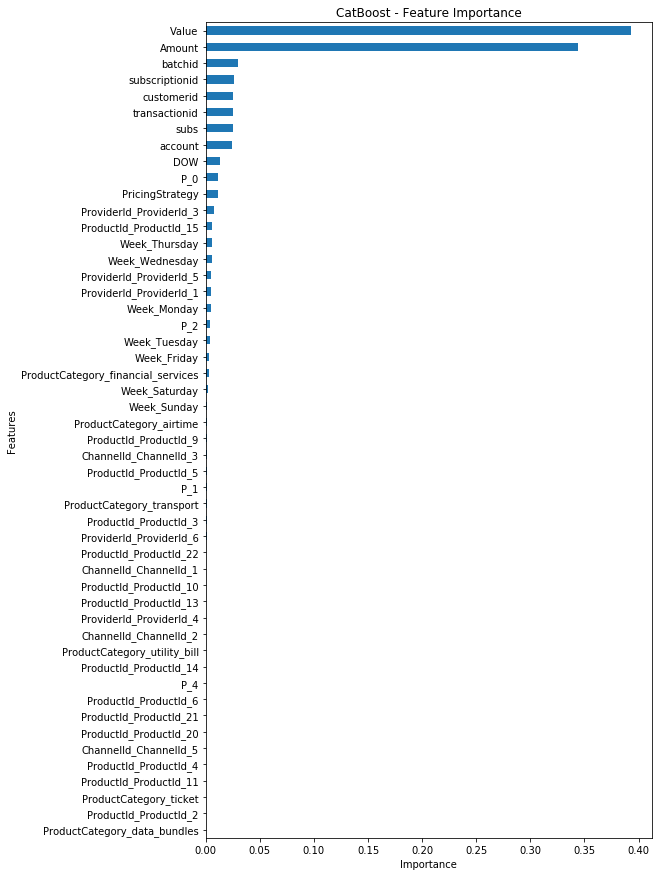

In [147]:
fea_imp = pd.DataFrame({'imp': model.feature_importances_, 'col': X_train.columns})
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-50:]
fea_imp.plot(kind='barh', x='col', y='imp', figsize=(8, 15), legend=None)
plt.title('CatBoost - Feature Importance')
plt.ylabel('Features')
plt.xlabel('Importance')
#plt.savefig('Profile+Base Features Importance.jpeg')
#plt.savefig('Base Features Importance.jpeg')

In [148]:
pred = pd.DataFrame(model.predict(dtest), columns = ['FraudResult'])
pred.FraudResult.value_counts()

0.0    44952
1.0       67
Name: FraudResult, dtype: int64

In [149]:
sample = pd.read_csv("sample_submission.csv")
pred = pd.concat([sample['TransactionId'], pred], axis =1)

In [94]:
#pred.to_csv("bl1.csv", index = False)

In [95]:
#pred.to_csv("bl2.csv", index = False)

In [150]:
pred.to_csv("sub.csv", index = False)